In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 创建对象

###  使用传递的值列表序列来创建序列, 让 pandas 创建默认整数索引

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

In [3]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

### 使用传递的numpy数组创建数据帧,并使用日期索引和标记列:

In [4]:
dates = pd.date_range('20130101', periods=6)

In [5]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [6]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))

In [7]:
df

,A,B,C,D
2013-01-01,-0.311892,-0.501616,-0.441525,0.432368
2013-01-02,0.686605,0.306992,0.389648,1.755639
2013-01-03,-1.484379,0.581990,-2.346726,-0.736903
2013-01-04,0.887609,1.115376,-0.704424,-1.692277
2013-01-05,-0.135329,0.335435,-1.512973,0.156743
2013-01-06,0.781519,-0.879650,1.215830,1.746863


### 使用传递的可转换序列的字典对象创建数据帧:

In [8]:
df2 = pd.DataFrame({
    'A': 1.,
    'B': pd.Timestamp('20130101'),
    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
    'D': np.array([3] * 4, dtype='int32'),
    'E': pd.Categorical(['test', 'train', 'test', 'train']),
    'F': 'foo'
})

In [9]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-01,1.0,3,test,foo
1,1.0,2013-01-01,1.0,3,train,foo
2,1.0,2013-01-01,1.0,3,test,foo
3,1.0,2013-01-01,1.0,3,train,foo


### 所有明确类型:

In [10]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

### 输出某个子集:

In [11]:
df2.E

0     test
1    train
2     test
3    train
Name: E, dtype: category
Categories (2, object): [test, train]

# 查看数据

### 查看帧顶部和底部的行:

In [12]:
df.head()

,A,B,C,D
2013-01-01,-0.311892,-0.501616,-0.441525,0.432368
2013-01-02,0.686605,0.306992,0.389648,1.755639
2013-01-03,-1.484379,0.581990,-2.346726,-0.736903
2013-01-04,0.887609,1.115376,-0.704424,-1.692277
2013-01-05,-0.135329,0.335435,-1.512973,0.156743


In [13]:
df.tail(3)

,A,B,C,D
2013-01-04,0.887609,1.115376,-0.704424,-1.692277
2013-01-05,-0.135329,0.335435,-1.512973,0.156743
2013-01-06,0.781519,-0.879650,1.215830,1.746863


### 显示索引, 列, 和底层的 numpy 数据:

In [14]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [15]:
df.columns

Index([u'A', u'B', u'C', u'D'], dtype='object')

In [16]:
df.values

array([[-0.31189241, -0.50161567, -0.44152484,  0.43236827],
       [ 0.68660545,  0.30699175,  0.38964787,  1.75563915],
       [-1.48437914,  0.58198963, -2.34672565, -0.73690341],
       [ 0.88760883,  1.11537622, -0.70442432, -1.69227689],
       [-0.13532867,  0.33543466, -1.51297314,  0.15674339],
       [ 0.78151885, -0.87964989,  1.21583033,  1.7468628 ]])

### 描述显示数据快速统计摘要:

In [17]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.070689,0.159754,-0.566695,0.277072
std,0.912035,0.729631,1.279889,1.363196
min,-1.484379,-0.879650,-2.346726,-1.692277
25%,-0.267751,-0.299464,-1.310836,-0.513492
50%,0.275638,0.321213,-0.572975,0.294556
75%,0.757790,0.520351,0.181855,1.418239
max,0.887609,1.115376,1.215830,1.755639


### 转置数据:

In [18]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-0.311892,0.686605,-1.484379,0.887609,-0.135329,0.781519
B,-0.501616,0.306992,0.581990,1.115376,0.335435,-0.879650
C,-0.441525,0.389648,-2.346726,-0.704424,-1.512973,1.215830
D,0.432368,1.755639,-0.736903,-1.692277,0.156743,1.746863


### 按轴排序:

In [19]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.432368,-0.441525,-0.501616,-0.311892
2013-01-02,1.755639,0.389648,0.306992,0.686605
2013-01-03,-0.736903,-2.346726,0.581990,-1.484379
2013-01-04,-1.692277,-0.704424,1.115376,0.887609
2013-01-05,0.156743,-1.512973,0.335435,-0.135329
2013-01-06,1.746863,1.215830,-0.879650,0.781519


### 按值排序:

In [20]:
df.sort_values(by='B')

,A,B,C,D
2013-01-06,0.781519,-0.879650,1.215830,1.746863
2013-01-01,-0.311892,-0.501616,-0.441525,0.432368
2013-01-02,0.686605,0.306992,0.389648,1.755639
2013-01-05,-0.135329,0.335435,-1.512973,0.156743
2013-01-03,-1.484379,0.581990,-2.346726,-0.736903
2013-01-04,0.887609,1.115376,-0.704424,-1.692277


In [21]:
df.sort_values(by=['C', 'B'])

,A,B,C,D
2013-01-03,-1.484379,0.581990,-2.346726,-0.736903
2013-01-05,-0.135329,0.335435,-1.512973,0.156743
2013-01-04,0.887609,1.115376,-0.704424,-1.692277
2013-01-01,-0.311892,-0.501616,-0.441525,0.432368
2013-01-02,0.686605,0.306992,0.389648,1.755639
2013-01-06,0.781519,-0.879650,1.215830,1.746863


# 选择器

## 读取

### 选择单列, 这会产生一个序列, 等价于 df.A:

In [22]:
df['A']

2013-01-01   -0.311892
2013-01-02    0.686605
2013-01-03   -1.484379
2013-01-04    0.887609
2013-01-05   -0.135329
2013-01-06    0.781519
Freq: D, Name: A, dtype: float64

### 使用 [] 选择行的片断:

In [23]:
df[0:3]

,A,B,C,D
2013-01-01,-0.311892,-0.501616,-0.441525,0.432368
2013-01-02,0.686605,0.306992,0.389648,1.755639
2013-01-03,-1.484379,0.581990,-2.346726,-0.736903


In [24]:
df['20130102': '20130104']

,A,B,C,D
2013-01-02,0.686605,0.306992,0.389648,1.755639
2013-01-03,-1.484379,0.581990,-2.346726,-0.736903
2013-01-04,0.887609,1.115376,-0.704424,-1.692277


## 使用标签选择

### 使用标签获取横截面:

In [25]:
df.loc[dates[0]]

A   -0.311892
B   -0.501616
C   -0.441525
D    0.432368
Name: 2013-01-01 00:00:00, dtype: float64

### 使用标签选择多轴:

In [26]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,-0.311892,-0.501616
2013-01-02,0.686605,0.306992
2013-01-03,-1.484379,0.581990
2013-01-04,0.887609,1.115376
2013-01-05,-0.135329,0.335435
2013-01-06,0.781519,-0.879650


### 显示标签切片, 包含两个端点:

In [27]:
df.loc['20130102': '20130104', ['A', 'B']]

,A,B
2013-01-02,0.686605,0.306992
2013-01-03,-1.484379,0.581990
2013-01-04,0.887609,1.115376


### 降低返回对象维度:

In [28]:
df.loc['20130102', ['A', 'B']]

A    0.686605
B    0.306992
Name: 2013-01-02 00:00:00, dtype: float64

### 获取标量值:

In [29]:
df.loc[dates[0], 'A']

-0.31189241380396443

### 快速访问并获取标量数据(等价上面的方法):

In [30]:
df.at[dates[0], 'A']

-0.31189241380396443

## 按位置选择

### 传递整数选择位置

In [31]:
df.iloc[3]

A    0.887609
B    1.115376
C   -0.704424
D   -1.692277
Name: 2013-01-04 00:00:00, dtype: float64

### 使用整数片断, 效果类似 numpy/python:

In [32]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,0.887609,1.115376
2013-01-05,-0.135329,0.335435


### 使用整数偏移定位列表, 效果类似 numpy/python 样式:

In [33]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,0.686605,0.389648
2013-01-03,-1.484379,-2.346726
2013-01-05,-0.135329,-1.512973


### 显示行切片:

In [34]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,0.686605,0.306992,0.389648,1.755639
2013-01-03,-1.484379,0.581990,-2.346726,-0.736903


### 显示列切片:

In [35]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-0.501616,-0.441525
2013-01-02,0.306992,0.389648
2013-01-03,0.581990,-2.346726
2013-01-04,1.115376,-0.704424
2013-01-05,0.335435,-1.512973
2013-01-06,-0.879650,1.215830


### 显式获取一个值:

In [36]:
df.iloc[1, 1]

0.30699174504282678

### 快速访问一个标量(等同上个方法):

In [37]:
df.iat[1, 1]

0.30699174504282678

# 布尔索引

### 使用单个列的值选择数据:

In [38]:
df[df.A > 0]

,A,B,C,D
2013-01-02,0.686605,0.306992,0.389648,1.755639
2013-01-04,0.887609,1.115376,-0.704424,-1.692277
2013-01-06,0.781519,-0.879650,1.215830,1.746863


### where 操作:

In [39]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,NaN,0.432368
2013-01-02,0.686605,0.306992,0.389648,1.755639
2013-01-03,NaN,0.581990,NaN,NaN
2013-01-04,0.887609,1.115376,NaN,NaN
2013-01-05,NaN,0.335435,NaN,0.156743
2013-01-06,0.781519,NaN,1.215830,1.746863


### 使用 isin() 筛选:

In [40]:
df2 = df.copy()

In [41]:
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']

In [42]:
df2

,A,B,C,D,E
2013-01-01,-0.311892,-0.501616,-0.441525,0.432368,one
2013-01-02,0.686605,0.306992,0.389648,1.755639,one
2013-01-03,-1.484379,0.581990,-2.346726,-0.736903,two
2013-01-04,0.887609,1.115376,-0.704424,-1.692277,three
2013-01-05,-0.135329,0.335435,-1.512973,0.156743,four
2013-01-06,0.781519,-0.879650,1.215830,1.746863,three


In [43]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,-1.484379,0.581990,-2.346726,-0.736903,two
2013-01-05,-0.135329,0.335435,-1.512973,0.156743,four


# 赋值

### 赋值一个新列, 通过索引自动对齐数据:

In [44]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))

In [45]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [46]:
df['F'] = s1

In [47]:
df

,A,B,C,D,F
2013-01-01,-0.311892,-0.501616,-0.441525,0.432368,NaN
2013-01-02,0.686605,0.306992,0.389648,1.755639,1.0
2013-01-03,-1.484379,0.581990,-2.346726,-0.736903,2.0
2013-01-04,0.887609,1.115376,-0.704424,-1.692277,3.0
2013-01-05,-0.135329,0.335435,-1.512973,0.156743,4.0
2013-01-06,0.781519,-0.879650,1.215830,1.746863,5.0


### 按标签赋值:

In [48]:
df.at[dates[0], 'A'] = 0

In [49]:
df

,A,B,C,D,F
2013-01-01,0.000000,-0.501616,-0.441525,0.432368,NaN
2013-01-02,0.686605,0.306992,0.389648,1.755639,1.0
2013-01-03,-1.484379,0.581990,-2.346726,-0.736903,2.0
2013-01-04,0.887609,1.115376,-0.704424,-1.692277,3.0
2013-01-05,-0.135329,0.335435,-1.512973,0.156743,4.0
2013-01-06,0.781519,-0.879650,1.215830,1.746863,5.0


### 按位置赋值:

In [50]:
df.iat[0, 1] = 0

In [51]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.441525,0.432368,NaN
2013-01-02,0.686605,0.306992,0.389648,1.755639,1.0
2013-01-03,-1.484379,0.581990,-2.346726,-0.736903,2.0
2013-01-04,0.887609,1.115376,-0.704424,-1.692277,3.0
2013-01-05,-0.135329,0.335435,-1.512973,0.156743,4.0
2013-01-06,0.781519,-0.879650,1.215830,1.746863,5.0


### 通过 numpy 数组分配赋值:

In [52]:
df.loc[:, 'D'] = np.array([5] * len(df))

In [53]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.441525,5,NaN
2013-01-02,0.686605,0.306992,0.389648,5,1.0
2013-01-03,-1.484379,0.581990,-2.346726,5,2.0
2013-01-04,0.887609,1.115376,-0.704424,5,3.0
2013-01-05,-0.135329,0.335435,-1.512973,5,4.0
2013-01-06,0.781519,-0.879650,1.215830,5,5.0


### where 操作赋值:

In [54]:
df2 = df.copy()

In [55]:
df2[df2 > 0] = -df2

In [56]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.441525,-5,NaN
2013-01-02,-0.686605,-0.306992,-0.389648,-5,-1.0
2013-01-03,-1.484379,-0.581990,-2.346726,-5,-2.0
2013-01-04,-0.887609,-1.115376,-0.704424,-5,-3.0
2013-01-05,-0.135329,-0.335435,-1.512973,-5,-4.0
2013-01-06,-0.781519,-0.879650,-1.215830,-5,-5.0


# 丢失的数据

pandas 主要使用 np.nan 替换丢失的数据. 默认情况下它并不包含在计算中.

### 重建索引允许 更改/添加/删除 指定指定轴索引, 并返回数据副本:

In [57]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [58]:
df1.loc[dates[0]: dates[1], 'E'] = 1

In [59]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.441525,5,NaN,1.0
2013-01-02,0.686605,0.306992,0.389648,5,1.0,1.0
2013-01-03,-1.484379,0.581990,-2.346726,5,2.0,NaN
2013-01-04,0.887609,1.115376,-0.704424,5,3.0,NaN


### 删除任何有丢失数据的行:

In [60]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,0.686605,0.306992,0.389648,5,1.0,1.0


### 填充丢失数据:

In [61]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.441525,5,5.0,1.0
2013-01-02,0.686605,0.306992,0.389648,5,1.0,1.0
2013-01-03,-1.484379,0.581990,-2.346726,5,2.0,5.0
2013-01-04,0.887609,1.115376,-0.704424,5,3.0,5.0


### 获取值是否为 nana 的布尔标记:

In [62]:
 pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


# 运算

## 统计
计算时一般不包括丢失的数据

### 在 index 轴上计算均值:

In [63]:
df.mean()  # axis参数默认为0, 表示 index 轴

A    0.122671
B    0.243357
C   -0.566695
D    5.000000
F    3.000000
dtype: float64

### 在 column 轴上计算均值:

In [64]:
df.mean(axis=1)

2013-01-01    1.139619
2013-01-02    1.476649
2013-01-03    0.750177
2013-01-04    1.859712
2013-01-05    1.537427
2013-01-06    2.223540
Freq: D, dtype: float64

### 用于运算的对象有不同维度并需要对齐. 除此之外, pandas 会自动沿着指定维度计算:

In [65]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)

In [66]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [67]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.441525,5,NaN
2013-01-02,0.686605,0.306992,0.389648,5,1.0
2013-01-03,-1.484379,0.581990,-2.346726,5,2.0
2013-01-04,0.887609,1.115376,-0.704424,5,3.0
2013-01-05,-0.135329,0.335435,-1.512973,5,4.0
2013-01-06,0.781519,-0.879650,1.215830,5,5.0


In [68]:
df.sub(s, axis=0)

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-2.484379,-0.418010,-3.346726,4.0,1.0
2013-01-04,-2.112391,-1.884624,-3.704424,2.0,0.0
2013-01-05,-5.135329,-4.664565,-6.512973,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


## Apply

### 在数据上使用函数:

In [69]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.441525,5,NaN
2013-01-02,0.686605,0.306992,-0.051877,10,1.0
2013-01-03,-0.797774,0.888981,-2.398603,15,3.0
2013-01-04,0.089835,2.004358,-3.103027,20,6.0
2013-01-05,-0.045494,2.339792,-4.616000,25,10.0
2013-01-06,0.736025,1.460142,-3.400170,30,15.0


In [70]:
df.apply(lambda x: x.max() - x.min())

A    2.371988
B    1.995026
C    3.562556
D    0.000000
F    4.000000
dtype: float64

## 直方图

In [71]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [72]:
s

0    4
1    3
2    1
3    5
4    1
5    3
6    4
7    0
8    3
9    2
dtype: int64

In [73]:
s.value_counts()

3    3
4    2
1    2
5    1
2    1
0    1
dtype: int64

## 字符串方法

### 序列可以使用一些字符串处理方法, 很轻易操作数据组中的每个元素, 比如以下代码片断.
### 注意: 字符匹配方法默认情况下, 通常使用正则表达式(并且大多数时候都如此).

In [74]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [75]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# 合并

pandas 提供各种工具以简便合并序列, 数据帧, 和组合对象. 在 连接/合并 类型操作中, 使用多种类型索引和相关数学函数.

### 把 pandas 对象连接到一起:

In [76]:
df = pd.DataFrame(np.random.randn(10, 4))

In [77]:
df

,0,1,2,3
0,0.085867,0.513563,0.041624,0.791599
1,-0.190677,0.960829,0.599935,-1.221240
2,0.379402,0.456860,0.066004,0.686955
3,-0.112566,-0.638590,-1.827733,-1.582189
4,-0.628915,1.365421,0.331256,-1.500590
5,1.218735,1.415607,0.593551,0.298029
6,0.405462,0.497741,0.521445,1.857883
7,1.497999,0.876684,-0.945989,0.374364
8,-1.856517,0.548953,-0.458480,-1.798278
9,0.378420,2.034275,-0.473547,0.464841


In [78]:
pieces = [df[:3], df[3:7], df[7:]]

In [79]:
pieces

[          0         1         2         3
 0  0.085867  0.513563  0.041624  0.791599
 1 -0.190677  0.960829  0.599935 -1.221240
 2  0.379402  0.456860  0.066004  0.686955,
           0         1         2         3
 3 -0.112566 -0.638590 -1.827733 -1.582189
 4 -0.628915  1.365421  0.331256 -1.500590
 5  1.218735  1.415607  0.593551  0.298029
 6  0.405462  0.497741  0.521445  1.857883,
           0         1         2         3
 7  1.497999  0.876684 -0.945989  0.374364
 8 -1.856517  0.548953 -0.458480 -1.798278
 9  0.378420  2.034275 -0.473547  0.464841]

In [80]:
pd.concat(pieces)

,0,1,2,3
0,0.085867,0.513563,0.041624,0.791599
1,-0.190677,0.960829,0.599935,-1.221240
2,0.379402,0.456860,0.066004,0.686955
3,-0.112566,-0.638590,-1.827733,-1.582189
4,-0.628915,1.365421,0.331256,-1.500590
5,1.218735,1.415607,0.593551,0.298029
6,0.405462,0.497741,0.521445,1.857883
7,1.497999,0.876684,-0.945989,0.374364
8,-1.856517,0.548953,-0.458480,-1.798278
9,0.378420,2.034275,-0.473547,0.464841


## 连接

### SQL 样式合并:

In [81]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [82]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [83]:
left

,key,lval
0,foo,1
1,foo,2


In [84]:
right

,key,rval
0,foo,4
1,foo,5


In [85]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


## 添加

### 添加行到数据帧:

In [86]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])

In [87]:
df

,A,B,C,D
0,-2.353653,-0.361222,0.798224,0.506240
1,-0.193153,1.163641,-0.485035,0.288091
2,0.009632,0.074484,2.668308,1.056560
3,1.505521,-1.499851,-0.486310,-0.404501
4,-0.555846,1.704672,-0.219953,-0.733658
5,2.062331,0.591177,-1.282067,-0.528559
6,-0.089678,-0.075559,-0.791764,0.486098
7,-2.260532,0.642875,-0.587037,-0.406093


In [88]:
s = df.iloc[3]

In [89]:
df.append(s, ignore_index=True)

,A,B,C,D
0,-2.353653,-0.361222,0.798224,0.506240
1,-0.193153,1.163641,-0.485035,0.288091
2,0.009632,0.074484,2.668308,1.056560
3,1.505521,-1.499851,-0.486310,-0.404501
4,-0.555846,1.704672,-0.219953,-0.733658
5,2.062331,0.591177,-1.282067,-0.528559
6,-0.089678,-0.075559,-0.791764,0.486098
7,-2.260532,0.642875,-0.587037,-0.406093
8,1.505521,-1.499851,-0.486310,-0.404501


# 分组

对于 "group by" 指的是以下一个或多个处理:
- 将数据按某些标准分割为不同的组
- 在每个独立组上应用函数
- 组合结果为一个数据结构

In [90]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'bar'],
                   'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})

In [91]:
df

,A,B,C,D
0,foo,one,-0.036846,-0.255391
1,bar,one,-0.184444,-0.092538
2,foo,two,0.254613,0.341791
3,bar,three,1.714425,-0.148348
4,foo,two,-0.906000,0.604271
5,bar,two,0.050995,-1.893565
6,foo,one,1.523907,0.327911
7,bar,three,-0.151025,-0.565036


### 分组, 然后应用函数统计总和, 存放到结果组:

In [92]:
df.groupby('A').sum()

,C,D
A,,
bar,1.429951,-2.699487
foo,0.835674,1.018583


### 按多列分组为层次索引, 然后应用函数:

In [93]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one   -0.184444 -0.092538
    three  1.563401 -0.713384
    two    0.050995 -1.893565
foo one    1.487061  0.072521
    two   -0.651387  0.946062

# 重塑

## 堆叠

In [94]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two','one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [95]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'seconds'])

In [96]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [97]:
df

A         B
first seconds                    
bar   one     -0.418519 -0.871636
      two     -0.005910 -1.909082
baz   one     -0.227868 -1.789480
      two     -1.084363 -1.162248
foo   one      0.417189 -0.091660
      two     -0.559417 -2.030405
qux   one      0.359085  0.759327
      two      1.126709  1.893276

In [98]:
df2 = df[:4]

In [99]:
df2

A         B
first seconds                    
bar   one     -0.418519 -0.871636
      two     -0.005910 -1.909082
baz   one     -0.227868 -1.789480
      two     -1.084363 -1.162248

### 堆叠函数, "压缩" 数据帧的列一个级别:

In [100]:
stacked = df2.stack()

In [101]:
stacked

first  seconds   
bar    one      A   -0.418519
                B   -0.871636
       two      A   -0.005910
                B   -1.909082
baz    one      A   -0.227868
                B   -1.789480
       two      A   -1.084363
                B   -1.162248
dtype: float64

### 被 "堆叠" 数据帧或序列(有多个索引作为索引), 其堆叠的反向操作为取消堆叠, 上面的数据默认反堆叠到上一级别:

In [102]:
stacked.unstack()

A         B
first seconds                    
bar   one     -0.418519 -0.871636
      two     -0.005910 -1.909082
baz   one     -0.227868 -1.789480
      two     -1.084363 -1.162248

In [103]:
stacked.unstack(level=1)

seconds       one       two
first                      
bar   A -0.418519 -0.005910
      B -0.871636 -1.909082
baz   A -0.227868 -1.084363
      B -1.789480 -1.162248

In [104]:
stacked.unstack(level=0)

first           bar       baz
seconds                      
one     A -0.418519 -0.227868
        B -0.871636 -1.789480
two     A -0.005910 -1.084363
        B -1.909082 -1.162248

## 数据透视表

### 查看数据透视表

In [105]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})

In [106]:
df

,A,B,C,D,E
0,one,A,foo,0.156289,0.165120
1,one,B,foo,0.513558,0.624124
2,two,C,foo,0.732072,-0.157862
3,three,A,bar,0.266838,-0.126594
4,one,B,bar,-1.660806,-0.314602
5,one,C,bar,1.862678,0.583574
6,two,A,foo,0.385399,1.258570
7,three,B,foo,0.576806,-0.261224
8,one,C,foo,0.264731,-0.643306
9,one,A,bar,1.312681,-0.210303


### 我们可以从上面的数据中, 非常容易的产生数据透视表:

In [107]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  1.312681  0.156289
      B -1.660806  0.513558
      C  1.862678  0.264731
three A  0.266838       NaN
      B       NaN  0.576806
      C  0.815101       NaN
two   A       NaN  0.385399
      B -2.137517       NaN
      C       NaN  0.732072

# 时间序列

pandas 有易用, 强大且高效的函数用于高频数据重采样转换操作(例如: 转换秒数据到5分钟数据).   
这是很普通的情况, 但不局限于金融应用.

### 重新采样:

In [108]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [109]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [110]:
ts.resample('5MIN').sum()

2012-01-01    21930
Freq: 5T, dtype: int64

### 时区表示:

In [111]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [112]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [113]:
ts

2012-03-06   -0.073222
2012-03-07    0.881658
2012-03-08    0.370263
2012-03-09   -0.292154
2012-03-10    0.027868
Freq: D, dtype: float64

In [114]:
ts_utc = ts.tz_localize('UTC')

In [115]:
ts_utc

2012-03-06 00:00:00+00:00   -0.073222
2012-03-07 00:00:00+00:00    0.881658
2012-03-08 00:00:00+00:00    0.370263
2012-03-09 00:00:00+00:00   -0.292154
2012-03-10 00:00:00+00:00    0.027868
Freq: D, dtype: float64

### 转换到其它时区:

In [116]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.073222
2012-03-06 19:00:00-05:00    0.881658
2012-03-07 19:00:00-05:00    0.370263
2012-03-08 19:00:00-05:00   -0.292154
2012-03-09 19:00:00-05:00    0.027868
Freq: D, dtype: float64

### 转换不同的时间跨度:

In [117]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [118]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [119]:
ts

2012-01-31   -1.754747
2012-02-29    0.131109
2012-03-31    0.054503
2012-04-30    1.074427
2012-05-31    0.777613
Freq: M, dtype: float64

In [120]:
ps = ts.to_period()

In [121]:
ps

2012-01   -1.754747
2012-02    0.131109
2012-03    0.054503
2012-04    1.074427
2012-05    0.777613
Freq: M, dtype: float64

In [122]:
ps.to_timestamp()

2012-01-01   -1.754747
2012-02-01    0.131109
2012-03-01    0.054503
2012-04-01    1.074427
2012-05-01    0.777613
Freq: MS, dtype: float64

### 转换时段, 并且使用一些运算函数. 下例中, 我们转换年报11月到季度结束每日上午9点的数据:

In [123]:
prng = pd.period_range('1990Q1', '2004Q4', freq='Q-NOV')

In [124]:
ts = pd.Series(np.random.randn(len(prng)), index=prng)

In [125]:
ts.head()

1990Q1    1.755814
1990Q2    0.167151
1990Q3    0.327848
1990Q4    0.227269
1991Q1    1.055252
Freq: Q-NOV, dtype: float64

In [126]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [127]:
ts.head()

1990-03-01 09:00    1.755814
1990-06-01 09:00    0.167151
1990-09-01 09:00    0.327848
1990-12-01 09:00    0.227269
1991-03-01 09:00    1.055252
Freq: H, dtype: float64

# 分类

In [128]:
df = pd.DataFrame({'id': [1, 2, 3, 4, 5, 6], 'raw_grade': ['a', 'b', 'b', 'a', 'a', 'e']})

### 转换原始类别为分类数据类型:

In [129]:
df['grade'] = df['raw_grade'].astype('category')

In [130]:
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

### 重命名分类为更有意义的名称(分配到 Series.cat.categories 对应位置):

In [131]:
df['grade'].cat.categories = ['very good', 'good', 'very bad']

In [132]:
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): [very good, good, very bad]

### 重排顺分类, 同时添加缺少的分类(序列 .cat 方法下返回新默认序列):

In [133]:
df['grade'] = df['grade'].cat.set_categories(['very bad', 'bad', 'medium', 'good', 'very good'])

In [134]:
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

### 排列分类中的顺序(不是按词汇排列):

In [135]:
df.sort_values('grade')

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


### 类别列分组, 并且也显示空类别:

In [136]:
df.groupby('grade').size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# 绘画

In [137]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [138]:
ts = ts.cumsum()

In [139]:
ts.plot()

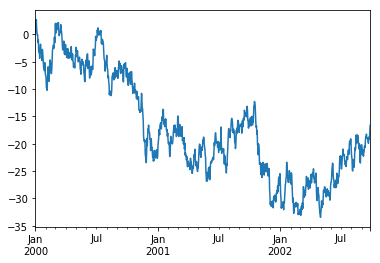

In [140]:
plt.show()

### 在数据帧中, 可以很方便的绘制带标签列:

In [141]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])

In [142]:
df = df.cumsum()

In [143]:
plt.figure()
df.plot()
plt.legend(loc='best')

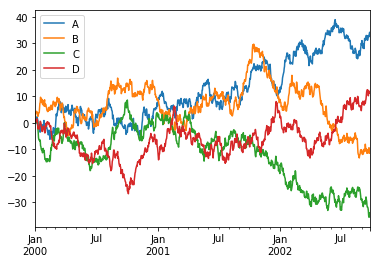

In [144]:
plt.show()

# 获取数据输入/输出

## CSV

### 写入 csv 文件:

In [164]:
df.to_csv('temp_file_foo.csv')

### 读取 csv 文件:

In [165]:
pd.read_csv('temp_file_foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,1.430209,1.968558,0.059136,0.787193
1,2000-01-02,-0.234998,3.073035,0.015335,0.830999
2,2000-01-03,-0.241807,4.134931,0.385721,1.258130
3,2000-01-04,1.464606,4.209923,0.230619,0.429119
4,2000-01-05,0.367327,4.363223,0.672987,0.789575
5,2000-01-06,1.268073,3.918725,1.255792,1.244330
6,2000-01-07,2.387129,4.017914,0.079637,1.546735
7,2000-01-08,1.106200,3.240994,0.373326,-0.349003
8,2000-01-09,1.019777,2.466453,-2.243106,-1.864587
9,2000-01-10,-1.542208,2.772979,-3.688410,-2.248906


## HDF5

### 写入 HDF 存储:

In [166]:
df.to_hdf('temp_file_foo.h5', key='df')

### 读取 HDF 存储:

In [168]:
pd.read_hdf('temp_file_foo.h5', key='df')

,A,B,C,D
2000-01-01,1.430209,1.968558,0.059136,0.787193
2000-01-02,-0.234998,3.073035,0.015335,0.830999
2000-01-03,-0.241807,4.134931,0.385721,1.258130
2000-01-04,1.464606,4.209923,0.230619,0.429119
2000-01-05,0.367327,4.363223,0.672987,0.789575
2000-01-06,1.268073,3.918725,1.255792,1.244330
2000-01-07,2.387129,4.017914,0.079637,1.546735
2000-01-08,1.106200,3.240994,0.373326,-0.349003
2000-01-09,1.019777,2.466453,-2.243106,-1.864587
2000-01-10,-1.542208,2.772979,-3.688410,-2.248906


## Excel

### 写入 excel 文件:

In [161]:
df.to_excel('temp_file_foo.xlsx', sheet_name='Sheet1')

### 读取 excel 文件:

In [163]:
pd.read_excel('temp_file_foo.xlsx', sheetname='Sheet1', index_col=None, na_values=['NA'])

,A,B,C,D
2000-01-01,1.430209,1.968558,0.059136,0.787193
2000-01-02,-0.234998,3.073035,0.015335,0.830999
2000-01-03,-0.241807,4.134931,0.385721,1.258130
2000-01-04,1.464606,4.209923,0.230619,0.429119
2000-01-05,0.367327,4.363223,0.672987,0.789575
2000-01-06,1.268073,3.918725,1.255792,1.244330
2000-01-07,2.387129,4.017914,0.079637,1.546735
2000-01-08,1.106200,3.240994,0.373326,-0.349003
2000-01-09,1.019777,2.466453,-2.243106,-1.864587
2000-01-10,-1.542208,2.772979,-3.688410,-2.248906
